# MNIST Double Layer CNN Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow2.x.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[CNN-01]
Import modules and set a random seed.

In [2]:
import os, random
os.environ['PYTHONHASHSEED'] = str(20230514)
os.environ['TF_USE_LEGACY_KERAS'] = '1'
random.seed(20230514)

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190213)
tf.random.set_seed(20190213)

####[CNN-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 [==============================] - 2s 0us/step


####[CNN-03]
Define a CNN model with a single convolutional filter layer.

In [4]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(32, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Conv2D(64, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv_filter1 (Conv2D)       (None, 28, 28, 32)        832       
                                                                 
 max_pooling1 (MaxPooling2D  (None, 14, 14, 32)        0         
 )                                                               
                                                                 
 conv_filter2 (Conv2D)       (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2 (MaxPooling2D  (None, 7, 7, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0

####[CNN-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CNN-05]
Train the model. It achieves over 99% accuracy.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 9s 9ms/step - loss: 0.1535 - acc: 0.9526 - val_loss: 0.0367 - val_acc: 0.9877
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0463 - acc: 0.9856 - val_loss: 0.0316 - val_acc: 0.9890
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0332 - acc: 0.9898 - val_loss: 0.0238 - val_acc: 0.9921
Epoch 4/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0218 - val_acc: 0.9926
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0262 - val_acc: 0.9917
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0160 - acc: 0.9946 - val_loss: 0.0246 - val_acc: 0.9915
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0272 - val_acc: 0.9925
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.

####[CNN-06]
Plot chars for accuracy and loss values.

<Axes: >

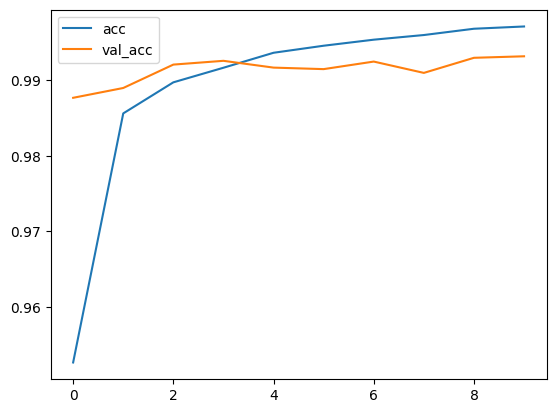

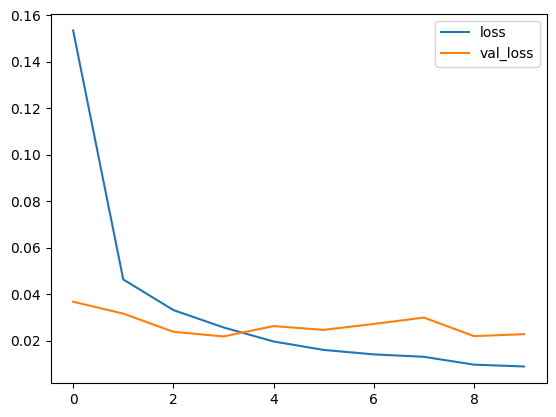

In [7]:
DataFrame({'acc': history.history['acc'],
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'],
           'val_loss': history.history['val_loss']}).plot()

####[CNN-07]
Mount your Google Drive on `/content/gdrive`.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####[MDF-08]
Export the trained model as a file `MNIST_double.hd5` on your Google Drive.

In [9]:
model.save('/content/gdrive/My Drive/MNIST_double.hd5', save_format='h5')
!ls -lh '/content/gdrive/My Drive/MNIST_double.hd5'

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


-rw------- 1 root root 38M Feb 16 09:07 '/content/gdrive/My Drive/MNIST_double.hd5'
